# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# Answer 1
### I chose the bikeshare hour count data set (that we used for the last assignmnet). I am using just Wednesday this time.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count = day_hour_count.fillna(0)

In [2]:
wed = day_hour_count[['wednesday']]
hour = day_hour_count[["hour"]]

In [3]:
poly15 = PolynomialFeatures(degree=15)

In [4]:
hour15 = poly15.fit_transform(hour)

In [5]:
linear15 = linear_model.LinearRegression()
linear15.fit(hour15, wed)


LinearRegression()

### Here, I am splitting the Wednesday dataset with train_test_split. I am then calculating the Training and Testing Errors

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(hour, wed, test_size=0.2)

xtrain15 = PolynomialFeatures(degree=15).fit_transform(xtrain)
xtest15 = PolynomialFeatures(degree=15).fit_transform(xtest)

train_linear15 = linear_model.LinearRegression().fit(xtrain15, ytrain)

MSEwed2 = metrics.mean_squared_error(ytrain, train_linear15.predict(xtrain15))
MAPEwed2 = metrics.mean_absolute_percentage_error(ytrain, train_linear15.predict(xtrain15))
print("MSE Wednesday - TRAINING SET:",MSEwed2)
print("MAPE Wednesday - TRAINING SET:",MAPEwed2)


MSE Wednesday - TRAINING SET: 26081.820552734254
MAPE Wednesday - TRAINING SET: 1347591861476240.8


In [7]:

MSEwed = metrics.mean_squared_error(ytest, train_linear15.predict(xtest15))
MAPEwed = metrics.mean_absolute_percentage_error(ytest, train_linear15.predict(xtest15))

print("MSE Wednesday - TEST SET:",MSEwed)
print("MAPE Wednesday - TEST SET:",MAPEwed)


MSE Wednesday - TEST SET: 35086.932271402475
MAPE Wednesday - TEST SET: 1.5110640929667263


### Below, I just plotted the test set and preditictions using the test data. I just did this to make sure everything looked alright and to confirm I wasn't outputting gibberish.

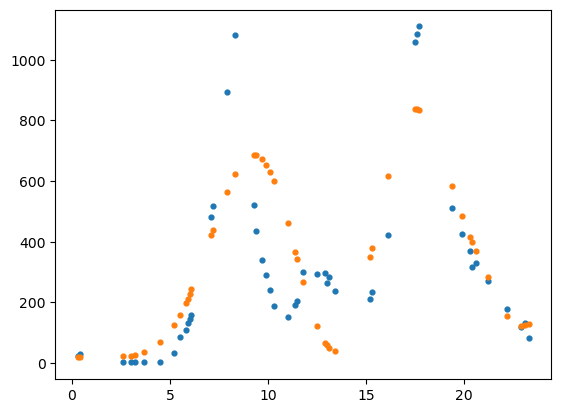

In [8]:
plt.scatter(xtest, ytest, s=12)
plt.scatter(xtest, train_linear15.predict(xtest15), s=12)

# Answer 2
### I used the "Heart.csv", from the data folder, as my CLASSIFICATION data
### The first steps, below, are to import the data, convert any data that needs to be included in the model to numeric data, and remove any non numeric data. I also dropped some fields that I did not want to include in the model.

In [9]:
heartData = pd.read_csv("../data/Heart.csv")
heartData.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [10]:
heartData['AHD'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
heartData['AHD_binary'] = np.where(heartData['AHD']=='Yes', 1,0)
heartData.head(10)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AHD_binary
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No,0
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes,1
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes,1


In [12]:
heartData.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD',
       'AHD_binary'],
      dtype='object')

In [13]:
unneeded_cols = ['ChestPain', 'Thal', 'AHD', 'Unnamed: 0', 'RestECG', 'ExAng', 'Oldpeak', 'Fbs', 'Ca', 'Slope']

In [14]:
modelData = heartData.copy().drop(unneeded_cols, axis=1)

In [15]:
modelData.isna().sum().sum()

0

### Now, that the data is ready, I will split the dataset and use a DecisionTree model.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(modelData.drop(['AHD_binary'], axis=1), 
                                                    modelData.AHD_binary, test_size=.20)

In [18]:
modelData.shape, x_train.shape, x_test.shape

((303, 6), (242, 5), (61, 5))

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier(criterion='entropy')

In [21]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
list(zip(modelData.drop(['AHD_binary'], axis=1).columns, model.feature_importances_))

[('Age', 0.14237951766611903),
 ('Sex', 0.06998604723461155),
 ('RestBP', 0.25899009720657645),
 ('Chol', 0.27053949212258743),
 ('MaxHR', 0.2581048457701055)]

In [23]:
test_pred = model.predict(x_test)

### Below, I will calculate the requested metrics for the model in Question 2

In [24]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [25]:
accuracy_score(y_test, test_pred)

0.5737704918032787

In [26]:
confusion_matrix(y_test, test_pred)

array([[17, 13],
       [13, 18]])

In [27]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        30
           1       0.58      0.58      0.58        31

    accuracy                           0.57        61
   macro avg       0.57      0.57      0.57        61
weighted avg       0.57      0.57      0.57        61



# Answer 3 (Bonus)
### Going to try and improve the first model by using more features, paying attention to feature importances, and modifying the model accrodingly.

In [28]:
heartData2 = pd.read_csv("../data/Heart.csv")

In [29]:
heartData2['AHD_binary'] = np.where(heartData2['AHD']=='Yes', 1,0)

In [30]:
heartData2['ChestPain'].unique(), heartData2['Thal'].unique()

(array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
       dtype=object),
 array(['fixed', 'normal', 'reversable', nan], dtype=object))

In [31]:
ChestPain_cond = [
    (heartData2['ChestPain']=='typical'),
    (heartData2['ChestPain']=='asymptomatic'), 
    (heartData2['ChestPain']=='nonanginal'), 
    (heartData2['ChestPain']=='nontypical')
]

Thal_cond =  [
    (heartData2['Thal']=='fixed'), 
    (heartData2['Thal']=='normal'), 
    (heartData2['Thal']=='reversable')
]

ChestPain_num = [0,1,2,3]
Thal_num = [0,1,2]

heartData2['ChestPain_num']= np.select(ChestPain_cond, ChestPain_num)
heartData2['Thal_num'] = np.select(Thal_cond, Thal_num)

heartData2.dropna()

heartData2.head(10)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AHD_binary,ChestPain_num,Thal_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,1,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,1,2
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,2,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,3,1
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No,0,3,1
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes,1,1,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No,0,1,1
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes,1,1,2
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes,1,1,2


In [32]:
heartData2.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD',
       'AHD_binary', 'ChestPain_num', 'Thal_num'],
      dtype='object')

### dropping irrelavant columns from model...also dropping Sex column, because in Answer #2 I, Sex had a relatively low feature importance value 

In [33]:
unneeded_cols = ['ChestPain', 'Thal', 'AHD', 'Unnamed: 0', 'ExAng', 'Oldpeak', 'Ca', 'Slope', 'Sex']

In [34]:
modelData2 = heartData2.copy().drop(unneeded_cols, axis=1)

In [35]:
modelData2.head(10)

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,AHD_binary,ChestPain_num,Thal_num
0,63,145,233,1,2,150,0,0,0
1,67,160,286,0,2,108,1,1,1
2,67,120,229,0,2,129,1,1,2
3,37,130,250,0,0,187,0,2,1
4,41,130,204,0,2,172,0,3,1
5,56,120,236,0,0,178,0,3,1
6,62,140,268,0,2,160,1,1,1
7,57,120,354,0,0,163,0,1,1
8,63,130,254,0,2,147,1,1,2
9,53,140,203,1,2,155,1,1,2


In [36]:
x_train, x_test, y_train, y_test = train_test_split(modelData2.drop(['AHD_binary'], axis=1), 
                                                    modelData2.AHD_binary, test_size=.20)

model2 = DecisionTreeClassifier(criterion='entropy')

In [37]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
list(zip(modelData2.drop(['AHD_binary'], axis=1).columns, model2.feature_importances_))

[('Age', 0.14505346683611867),
 ('RestBP', 0.10458029853261847),
 ('Chol', 0.2283597682905279),
 ('Fbs', 0.008871468345427017),
 ('RestECG', 0.04106434950167138),
 ('MaxHR', 0.13258757608745012),
 ('ChestPain_num', 0.23887069704422131),
 ('Thal_num', 0.10061237536196499)]

### Dropping Fbs and RestECG fields, low scores in feature importances. Refitting model below

In [39]:
unneeded_cols = ['ChestPain', 'Thal', 'AHD', 'Unnamed: 0', 'ExAng', 'Oldpeak', 
                 'Ca', 'Slope', 'Sex', 'Fbs', 'RestECG']

modelData2 = heartData2.copy().drop(unneeded_cols, axis=1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(modelData2.drop(['AHD_binary'], axis=1), 
                                                    modelData2.AHD_binary, test_size=.20)

model2 = DecisionTreeClassifier(criterion='entropy')

In [41]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
test_pred = model2.predict(x_test)

In [43]:
accuracy_score(y_test, test_pred)

0.6885245901639344

In [44]:
confusion_matrix(y_test, test_pred)

array([[22, 13],
       [ 6, 20]])

In [45]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        35
           1       0.61      0.77      0.68        26

    accuracy                           0.69        61
   macro avg       0.70      0.70      0.69        61
weighted avg       0.71      0.69      0.69        61



## Improvements in all the metrics!!